


$ H = - \frac{d^2}{dx^2} + V_0 \exp{(-x^2)}$



$H\Psi = E\Psi$

Задачи:
- Найти константы связи $V_0$, при которых в системе возникает 1, 2 или 3 связанных состояния
- Исследовать зависимость вычислительных затрат от размера сетки
- Иссследовать зависимость погрешности энергий состояний от размера сетки и границ бокса


In [2]:
from tokenize import Double
import numpy as np
import time
# from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eig
from matplotlib import pyplot as plt


def getPotentialValue(x: np.double, v_0: np.double) -> np.double:
    return (-1) * v_0 * np.exp(-1 * (x * x), dtype=np.double)

def makeDiffMatrix(n: int, R: np.double, v_0: np.double) -> np.ndarray:
    delta = 2*R / (n-1)
    diagonal = np.zeros(n, dtype=np.double)
    subDiagonal = np.ones(n-1, dtype=np.double) * (-1) / (delta * delta)
    
    xs = np.linspace(-R, R, n, dtype=np.double)
    
    for i in range(n):
        diagonal[i] = 2 / (delta * delta) + getPotentialValue(xs[i], v_0)

    # return diags([diagonal, subDiagonal, subDiagonal], [0, -1, 1])  
    return (diagonal, subDiagonal)



<font size="5">Рассмотрим зависимость количества собственных чисел меньше нуля от константы связи </font>

1  :   [-0.35399195]
2  :   [-0.95478035]
3  :   [-1.64146616 -0.00729761]
4  :   [-2.37544014 -0.15085686]
5  :   [-3.14033547 -0.40612305]
6  :   [-3.92744259 -0.7397841 ]
7  :   [-4.7314869  -1.13132612]
8  :   [-5.54899229 -1.56784625]
9  :   [-6.37752654e+00 -2.04061688e+00 -1.23906717e-03]
10  :   [-7.21530995 -2.543412   -0.07915985]
11  :   [-8.06099429 -3.07160685 -0.21926024]


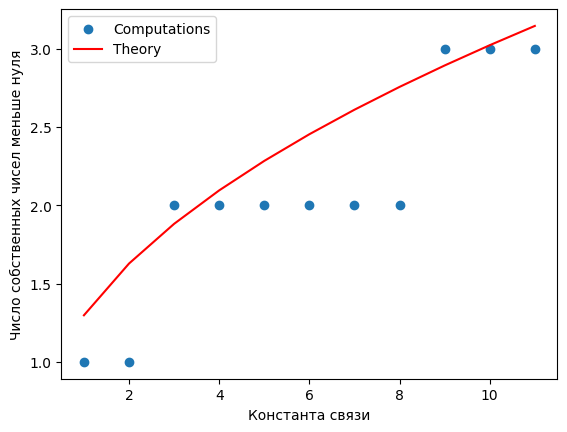

In [7]:
numberOfPoints = 10000
boxBorder = 15
# potentials = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
potentials = [*range(1,12)]
nStatStates = []

for V_0 in potentials:
    (diag, subdiag) = makeDiffMatrix(numberOfPoints, boxBorder, V_0)
    w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-100, 0))
    print(V_0, " :  ", w[:5])
    # statState = (w < 0).sum()
    nStatStates.append(len(w))
    

    # plt.plot(xs, getPotentialValue(xs, V_0))

plt.scatter(potentials, nStatStates, label='Computations')
Ns = [2 * np.sqrt(x/ (2 * np.pi)) + 1/2 for x in potentials]
plt.plot(potentials, Ns, color='r', label='Theory')
plt.xlabel("Константа связи")
plt.ylabel("Число собственных чисел меньше нуля")
plt.legend()
plt.savefig(("Constant.png"), dpi=300, bbox_inches='tight')
plt.show()

<font size="5">Рассмотрим зависимость количества собственных чисел меньше нуля от размера бокса </font>

3.0  :   [-0.29235429]
4.0  :   [-0.33742705]
5.0  :   [-0.34920022]
6.0  :   [-0.35256294]
7.0  :   [-0.3535605]
8.0  :   [-0.35386104]
9.0  :   [-0.35395214]
10.0  :   [-0.35397982]
19  :   [-0.35399205]
30  :   [-0.35399234]
50  :   [-0.35399321]
100  :   [-0.35399727]
200  :   [-0.35401349]
500  :   [-0.35412721]
1000  :   [-0.35453537]


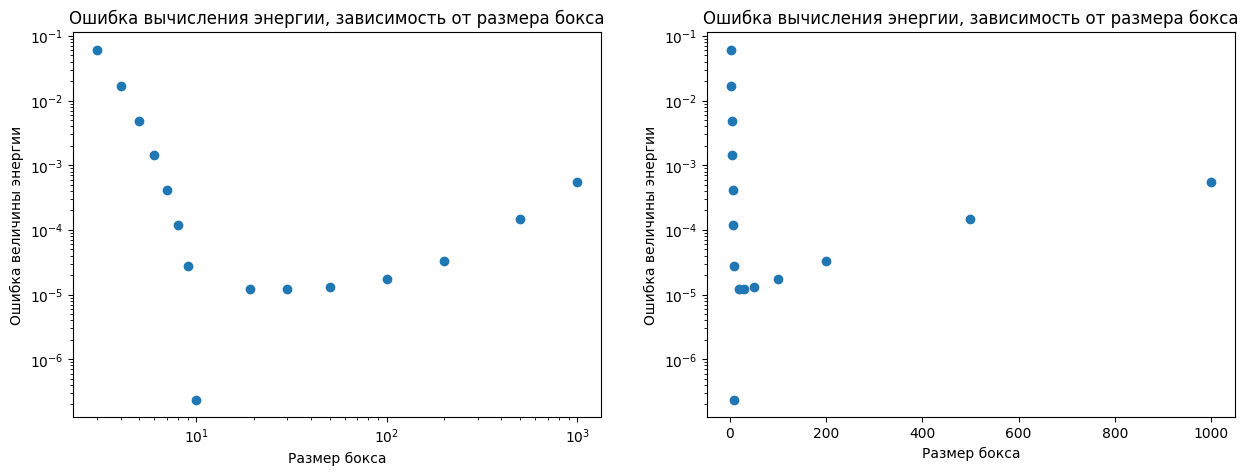

Изменения энергии основного состояния по сравнению с предыдущим шагом:  [0.061625771943880026, 0.01655301109161067, 0.004779844387446386, 0.0014171241623374131, 0.00041955924964309776, 0.00011901759630100761, 2.791932139950548e-05, 2.3788826847281896e-07, 1.199252707873022e-05, 1.2284265389794768e-05, 1.3149448634119931e-05, 1.7205149375698614e-05, 3.3431063698963204e-05, 0.0001471518097793667, 0.0005553053353372639]


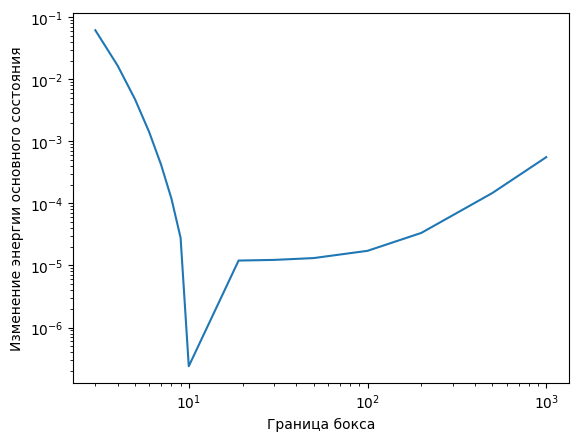

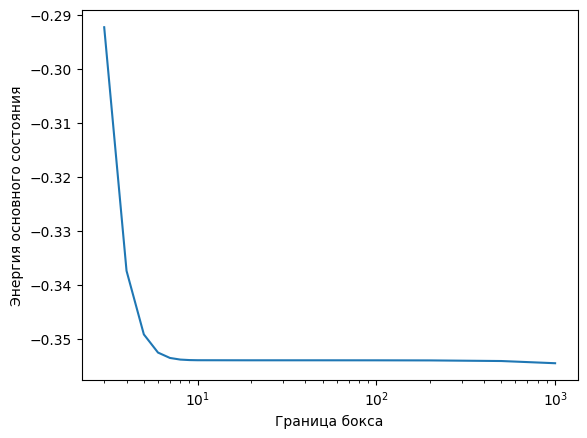

In [19]:
numberOfPoints = 10000
boxBorders = [ 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 19, 30, 50, 100, 200, 500, 1000]
# potentials = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
potential = 1.0
nStatStates = []
gsEnergies = []
errDecreases = []

prevEnergy = 0.0
for boxBorder in boxBorders:
    (diag, subdiag) = makeDiffMatrix(numberOfPoints, boxBorder, potential)
    w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-100, 0))
    print(boxBorder, " :  ", w[:5])
    # statState = (w < 0).sum()
    nStatStates.append(len(w))
    if len(w) > 0:
        gsEnergies.append(w[0])
    else:
        gsEnergies.append(0)
    # errDecreases.append(abs(w[0] - prevEnergy))
    errDecreases.append(abs(w[0] - (-0.35398006)))
    prevEnergy = w[0]
    # plt.plot(xs, getPotentialValue(xs, V_0))

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
axes[0].scatter(boxBorders, errDecreases)
axes[0].set_xlabel("Размер бокса")
axes[0].set_ylabel("Ошибка величины энергии")
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Ошибка вычисления энергии, зависимость от размера бокса")
axes[1].scatter(boxBorders, errDecreases)
axes[1].set_xlabel("Размер бокса")
axes[1].set_ylabel("Ошибка величины энергии")
axes[1].set_yscale('log')
axes[1].set_title("Ошибка вычисления энергии, зависимость от размера бокса")
plt.savefig(("Error_box_size.png"), dpi=300, bbox_inches='tight')
plt.show()

print("Изменения энергии основного состояния по сравнению с предыдущим шагом: ", end=' ')
print(errDecreases)
plt.plot(boxBorders, errDecreases)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Граница бокса")
plt.ylabel("Изменение энергии основного состояния")
plt.show()

plt.plot(boxBorders, gsEnergies)
plt.xscale('log')
plt.xlabel("Граница бокса")
plt.ylabel("Энергия основного состояния")
plt.show()

<font size="5">Рассмотрим зависимость количества собственных чисел меньше нуля от размера сетки, а также затраты вычислительных ресурсов </font>

100  :   [-0.35624587]
1000  :   [-0.35401353]
10000  :   [-0.35399207]
100000  :   [-0.35399186]
1000000  :   [-0.35399172]
10000000  :   [-0.35398006]


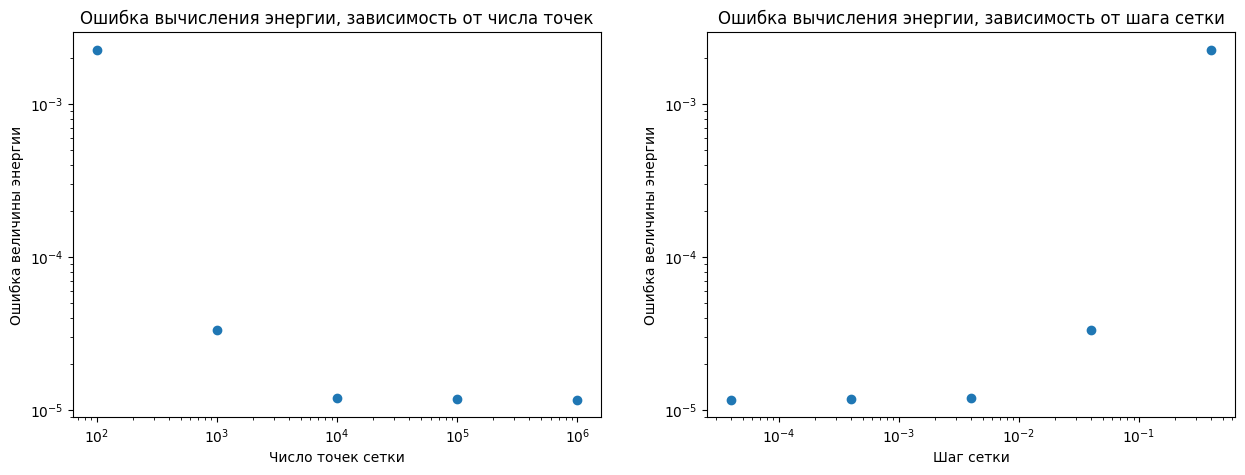

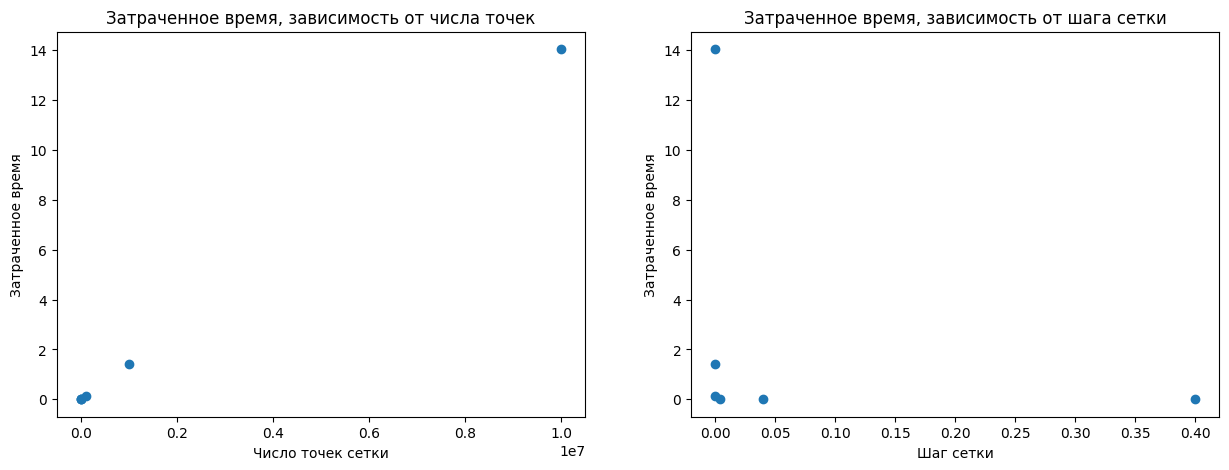

In [21]:
numberOfPoints = [10**x for x in range(2, 8)]
boxBorder = 20
potential = 1
nStatStates = []
computationalTimes = []
errDecreases = []

prevEnergy = 0.0
for nPoints in numberOfPoints:
    start_time = time.time()
    (diag, subdiag) = makeDiffMatrix(nPoints, boxBorder, potential)
    w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-100, 0))
    res_time = time.time() - start_time
    
    print(nPoints, " :  ", w[:5])
    nStatStates.append(len(w))
    computationalTimes.append(res_time)
    
    # errDecreases.append(abs(w[0] - prevEnergy))
    errDecreases.append(abs(w[0] - (-0.35398006)))
    prevEnergy = w[0]
    

    # plt.plot(xs, getPotentialValue(xs, V_0))

# plt.scatter(numberOfPoints, nStatStates)
# plt.xscale('log')
# plt.show()
# print("Изменения энергии основного состояния по сравнению с предыдущим шагом: ", end=' ')
# print(errDecreases)
# plt.plot(numberOfPoints, errDecreases)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel("Число точек сетки")
# plt.ylabel("Изменение энергии основного состояния")
# plt.show()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
axes[0].scatter(numberOfPoints[:-1], errDecreases[:-1])
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Ошибка величины энергии")
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Ошибка вычисления энергии, зависимость от числа точек")
axes[1].scatter([2*boxBorder / x for x in numberOfPoints[:-1]], errDecreases[:-1])
axes[1].set_xlabel("Шаг сетки")
axes[1].set_ylabel("Ошибка величины энергии")
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title("Ошибка вычисления энергии, зависимость от шага сетки")
plt.savefig(("Error_net_size.png"), dpi=300, bbox_inches='tight')
plt.show()


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
axes[0].scatter(numberOfPoints, computationalTimes)
axes[0].set_xlabel("Число точек сетки")
axes[0].set_ylabel("Затраченное время")
# axes[0].set_xscale('log')
# axes[0].set_yscale('log')
axes[0].set_title("Затраченное время, зависимость от числа точек")
axes[1].scatter([2*boxBorder / x for x in numberOfPoints], computationalTimes)
axes[1].set_xlabel("Шаг сетки")
axes[1].set_ylabel("Затраченное время")
# axes[1].set_xscale('log')
# axes[1].set_yscale('log')
axes[1].set_title("Затраченное время, зависимость от шага сетки")
plt.savefig(("Time_net_size_2.png"), dpi=300, bbox_inches='tight')
plt.show()
# plt.scatter(numberOfPoints, computationalTimes)
# # plt.xscale('log')
# # plt.yscale('log')
# plt.xlabel("Число точек сетки")
# plt.ylabel("Затраченное время")
# plt.xscale('log')
# plt.show()



In [7]:
print(type(w[0]))

<class 'numpy.float64'>
